In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
import math
from sklearn.ensemble import RandomForestRegressor

In [37]:
df = pd.read_csv("/content/drive/MyDrive/Collab DataSets/Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [38]:
x = df["Level"].values
x = x.reshape(-1, 1)
y = df["Salary"].values
y = y.reshape(-1, 1)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [40]:
modelRF = RandomForestRegressor(random_state=0)
modelRF.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [41]:
for i in range(len(modelRF.estimators_)):
  plt.figure(figsize=(15,10))
  tree.plot_tree(modelRF.estimators_[i], filled= True)

Output hidden; open in https://colab.research.google.com to view.

In [42]:
y_pred = modelRF.predict([[6.5]])
y_pred

array([162500.])

In [43]:
mse = mean_squared_error(y_test, modelRF.predict(x_test))
r_square = modelRF.score(x,y)

print(f"The Mean Squared Error of Model is {math.sqrt(mse)}")
print(f"And The R Square Of Model Is {r_square}")

The Mean Squared Error of Model is 21234.994702142027
And The R Square Of Model Is 0.9243397469076303


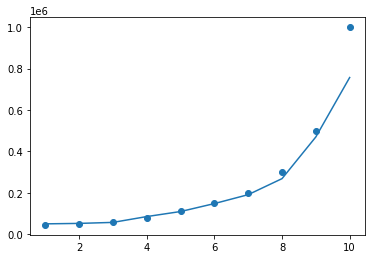

In [44]:
plt.scatter(x,y)
plt.plot(x, modelRF.predict(x))